# Case study 3: Decreasing mortality risk with age in *Homarus gammarus*

In [7]:
import numpy as np
import matplotlib.pyplot as plt

import figures
from cohort_model import (
    population_survivorship_difference,
    HYP_WILD_TYPE,
    MUTANT_WILD
)
from fitness_calculations import get_fitness_data, homarus_fertility

## Predicted lifetime reproductive success and intrinsic rate of increase for females with indeterminate growth and negative senescence not restraining and restraining somatic maintenance (Figure 5 in paper)

In [2]:
# Figure 5 parameters
number_of_individuals = 1000
number_of_repetitions = 1000 # TODO: riktig?
alpha = 0.000222 # TODO: riktig?
kappa = 0.033 # TODO: riktig?

epsilons = np.array([0.01, 0.02, 0.03, 0.04])

t_m = 100 # TODO: riktig?

hazard_rates_wt = np.array(0.077).repeat(4)

beta =  0.8
sigma = 1.0
gamma = 4.0
mu = 50.0
frequency = 4 # Birth terms every nth time step

In [3]:
%%time
population_simulations, mean_diff, std_diff = population_survivorship_difference(
    number_of_individuals=number_of_individuals,
    number_of_repetitions=number_of_repetitions,
    epsilons=epsilons,
    hazard_rates_wt=hazard_rates_wt,
    alpha=alpha,
    kappa=kappa,
    t_m=t_m,
    beta=beta
)

CPU times: user 1min 57s, sys: 1min 34s, total: 3min 31s
Wall time: 3min 38s


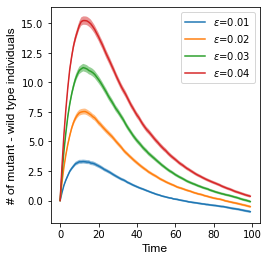

In [4]:
# Figure not in paper, but the simulation data are needed for figure 5
figures.plot_fig_2(t_m, mean_diff, std_diff, number_of_repetitions)

In [8]:
f_wt = homarus_fertility(t_m, sigma, gamma, frequency, HYP_WILD_TYPE)
fertility_wt = list(zip(range(t_m), f_wt))

f_mut = homarus_fertility(t_m, sigma, gamma, frequency, MUTANT_WILD, mu=mu, alpha=alpha, kappa=kappa)
fertility_mut = list(zip(range(t_m), f_mut))

In [9]:
fitness_stats_wt = get_fitness_data(population_simulations[HYP_WILD_TYPE], number_of_repetitions, t_m, fertility_wt)
fitness_stats_mut = get_fitness_data(population_simulations[MUTANT_WILD], number_of_repetitions, t_m, fertility_mut)

Increase in R0 from hypothetical wild type to mutant: 2.87%
Increase in r from hypothetical wild type to mutant: 1.75%


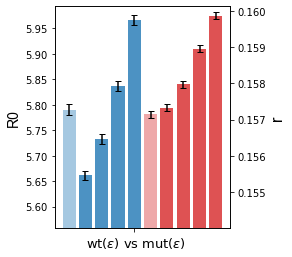

In [10]:
figures.plot_fig_5(fitness_stats_wt, fitness_stats_mut)

mean_r0_wt = fitness_stats_wt["mean_r0"]
mean_r_wt = fitness_stats_wt["mean_r"]
mean_r0_mut = fitness_stats_mut["mean_r0"]
mean_r_mut = fitness_stats_mut["mean_r"]

print(f"Increase in R0 from hypothetical wild type to mutant: {(mean_r0_mut[3] - mean_r0_wt[3]) / mean_r0_wt[3] * 100:.2f}%")
print(f"Increase in r from hypothetical wild type to mutant: {(mean_r_mut[3] - np.mean(mean_r_wt)) / np.mean(mean_r_wt) * 100:.2f}%")